# 🦠 Pandemic Commander
Welcome to the outbreak simulation!

You're in charge of managing a fictional disease outbreak. Your job is to tweak the parameters and try to complete three increasingly difficult public health challenges.

👇 Change the values in the code blocks, run the code, and check your results!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [3]:
def SIR_model(y, t, beta, gamma, vaccination_rate):
    S, I, R = y
    dSdt = -beta * S * I + vaccination_rate * R
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I - vaccination_rate * R
    return [dSdt, dIdt, dRdt]

In [4]:
def simulate_sir(beta, gamma, vaccination_rate, label):
    S0, I0, R0 = 0.99, 0.01, 0.0
    y0 = [S0, I0, R0]
    global t, I  # make t and I accessible for checking duration later
    t = np.linspace(0, 160, 160)
    solution = odeint(SIR_model, y0, t, args=(beta, gamma, vaccination_rate))
    S, I, R = solution.T
    plt.plot(t, I, label=f'{label} (peak={max(I):.2f})')
    return max(I), R[-1], I[100]

## ✅ CHALLENGE 1: Strategic Flattening
Flatten the curve — but don’t stop the outbreak too early!
**Goal:**
- Peak infections must be **below 0.25**
- The outbreak must last **at least 60 days**

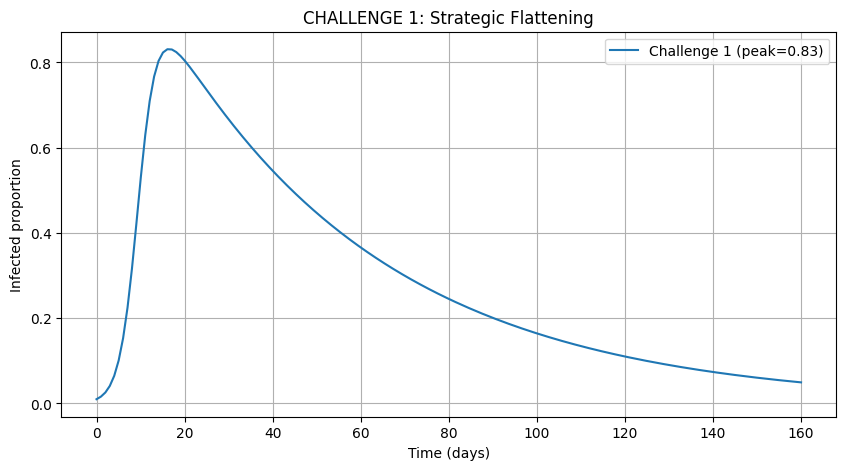

✅ Peak Infection = 0.83
✅ Duration until infections fall below 0.001: 160 days
🔁 Try again: Your curve was either too high or too short.


In [9]:
##### 🔧 Tweak these for CHALLENGE 1

### YOU CAN CHANGE THE CODE FROM HERE  ###
beta = 0.5
gamma = 0.02
### TO HERE ###

plt.figure(figsize=(10, 5))
peak, final_R, I_day100 = simulate_sir(beta, gamma, 0, 'Challenge 1')
plt.title('CHALLENGE 1: Strategic Flattening')
plt.xlabel('Time (days)')
plt.ylabel('Infected proportion')
plt.grid(True)
plt.legend()
plt.show()

duration = t[np.argmax(I < 0.001)] if np.any(I < 0.001) else 160
print(f'✅ Peak Infection = {peak:.2f}')
print(f'✅ Duration until infections fall below 0.001: {duration:.0f} days')
if peak < 0.25 and duration >= 60:
    print("🎉 SUCCESS: Strategic flattening achieved!")
else:
    print("🔁 Try again: Your curve was either too high or too short.")

## ✅ CHALLENGE 2: Delayed Vaccination
Roll out vaccines only after day 40

**Goal:**
- Final recovered > 70%
- Peak infections < 0.4

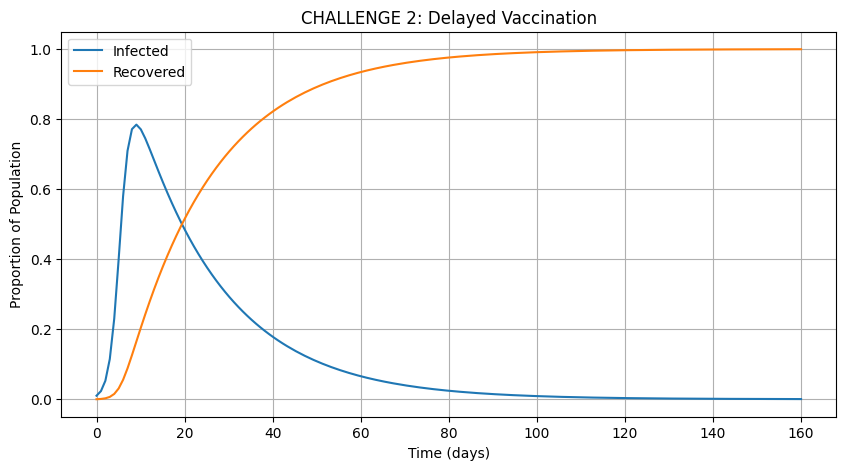

✅ Peak Infection = 0.78
✅ Final Recovered = 1.00
🔁 Try again: Too many got infected or not enough recovered.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ✅ Delayed vaccination model (S → R after day 40)
def delayed_vaccine_model(y, t, beta, gamma, vaccination_rate):
    S, I, R = y
    vac = vaccination_rate if t > 40 else 0  # Vaccine starts after day 40
    dSdt = -beta * S * I - vac * S
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I + vac * S
    return [dSdt, dIdt, dRdt]

### YOU CAN CHANGE THE CODE FROM HERE ###
beta = 0.9
gamma = 0.05
vaccination_rate = 0.5
### TO HERE ###

# Initial conditions
S0, I0, R0 = 0.99, 0.01, 0.0
y0 = [S0, I0, R0]
t = np.linspace(0, 160, 160)

# Solve
solution = odeint(delayed_vaccine_model, y0, t, args=(beta, gamma, vaccination_rate))
S, I, R = solution.T

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.title('CHALLENGE 2: Delayed Vaccination')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.grid(True)
plt.legend()
plt.show()

# Evaluate results
peak = max(I)
final_R = R[-1]
print(f'✅ Peak Infection = {peak:.2f}')
print(f'✅ Final Recovered = {final_R:.2f}')
if peak <= 0.4 and final_R >= 0.7:
    print("🎉 SUCCESS: You achieved delayed herd immunity!")
else:
    print("🔁 Try again: Too many got infected or not enough recovered.")


## ✅ CHALLENGE 3: Suppression and Rebound

Can you control a second wave?

**Goal:**
- Suppress infections → **Below 1% by day 50**
- Allow a rebound → **Above 5% by day 100**

**What makes this tricky?**  
You’ll write your own logic for how **β (infection rate)** changes over time — just like real-world lockdowns and re-openings.

👇 Try adjusting the time points and beta values inside the `beta_policy(t)` function.


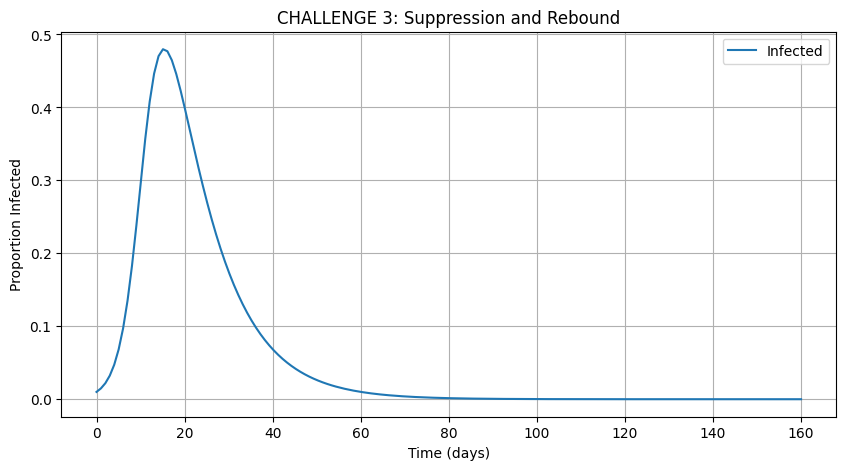

✅ Infected at Day 50 = 0.026
✅ Infected at Day 100 = 0.000
🔁 Try again: Suppression or rebound conditions not met.


In [27]:
# 🔧 CHALLENGE 3: Suppression and Rebound (custom policy version)

### YOU CAN CHANGE THE CODE FROM HERE  ###
def beta_policy(t):
    if t < 40:
        return 0.5
    elif t < 80:
        return 0.5
    else:
        return 0.1
### TO HERE ###

def custom_policy_model(y, t):
    S, I, R = y
    beta = beta_policy(t)
    gamma = 0.1
    vaccination_rate = 0.00
    dSdt = -beta * S * I + vaccination_rate * R
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I - vaccination_rate * R
    return [dSdt, dIdt, dRdt]

y0 = [0.99, 0.01, 0.0]
t = np.linspace(0, 160, 160)
solution = odeint(custom_policy_model, y0, t)
S, I, R = solution.T

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Infected')
plt.title('CHALLENGE 3: Suppression and Rebound')
plt.xlabel('Time (days)')
plt.ylabel('Proportion Infected')
plt.grid(True)
plt.legend()
plt.show()

# Evaluation
print(f'✅ Infected at Day 50 = {I[50]:.3f}')
print(f'✅ Infected at Day 100 = {I[100]:.3f}')
if I[50] < 0.01 and I[100] > 0.05:
    print("🎉 SUCCESS: You suppressed the outbreak then triggered a rebound!")
else:
    print("🔁 Try again: Suppression or rebound conditions not met.")



## ⭐ BONUS CHALLENGE: Design Your Own Outbreak

You're now the Chief Outbreak Strategist!

**Your task:**
Create a simulation that meets **ALL** of the following:

1. **Late peak** – Infections must peak **after day 100**
2. **Short epidemic** – Infections fall close to zero by **day 150**
3. **Minimal harm** – No more than **30% of the population gets infected at any point**

💡 You can:
- Define your own `beta_policy(t)`
- Use vaccination **with or without delay**
- Tweak `gamma` and `vaccination_rate`
- Use any model structure from the previous challenges

---

📊 Be ready to:
- Show your infection curve
- Explain your approach to your group or the class
- (Optional) Compete for the “Best-Controlled Outbreak” prize 🏆


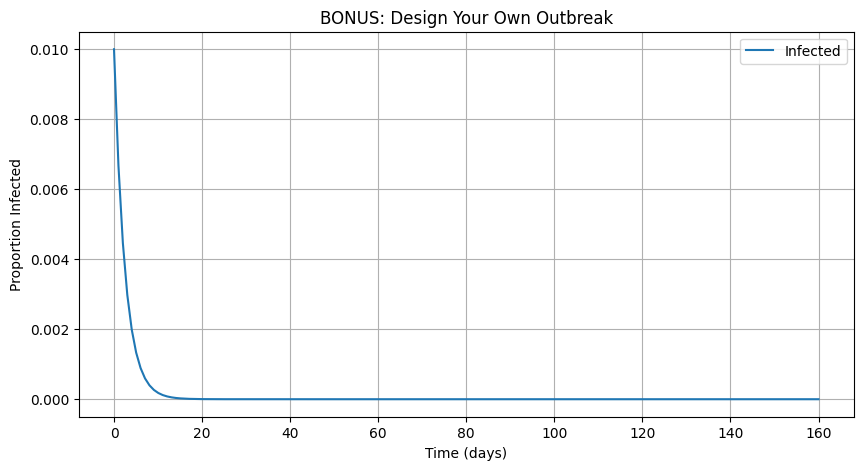

📈 Peak infection = 0.01 on day 0
🧘 Infected at day 150 = -0.0000
🔁 Try again: Adjust your beta_policy or parameters to meet all 3 goals.


In [29]:
### YOU CAN CHANGE THE CODE FROM HERE ###
# 1. Define your own beta policy
def beta_policy(t):
    if t < 80:
        return 0.1
    elif t < 120:
        return 0.3
    else:
        return 0.4

# 2. Choose your gamma (recovery) and vaccination settings
gamma = 0.5
vaccination_rate = 0.5
### TO HERE ###

# 3. Model using your beta_policy
def custom_model(y, t):
    S, I, R = y
    beta = beta_policy(t)
    dSdt = -beta * S * I + vaccination_rate * R
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I - vaccination_rate * R
    return [dSdt, dIdt, dRdt]

# 4. Run simulation
y0 = [0.99, 0.01, 0.0]
t = np.linspace(0, 160, 160)
solution = odeint(custom_model, y0, t)
S, I, R = solution.T

# 5. Plot
plt.figure(figsize=(10, 5))
plt.plot(t, I, label='Infected')
plt.title('BONUS: Design Your Own Outbreak')
plt.xlabel('Time (days)')
plt.ylabel('Proportion Infected')
plt.grid(True)
plt.legend()
plt.show()

# 6. Check success criteria
peak_day = t[np.argmax(I)]
peak_val = max(I)
final_I = I[150] if len(I) > 150 else I[-1]

print(f'📈 Peak infection = {peak_val:.2f} on day {peak_day:.0f}')
print(f'🧘 Infected at day 150 = {final_I:.4f}')

if peak_day > 100 and peak_val < 0.3 and final_I < 0.01:
    print("🎉 SUCCESS: You designed a controlled outbreak with minimal harm!")
else:
    print("🔁 Try again: Adjust your beta_policy or parameters to meet all 3 goals.")
